In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels as sms

In [2]:
df_airlines= pd.read_csv('airline_passengers.csv')

In [3]:
df_airlines.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
# to check null values

df_airlines.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [5]:
df_airlines.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [6]:
# as there is only 1 row, drop it. 
df_airlines.dropna(axis=0,inplace=True)

In [7]:
df_airlines.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [9]:
df_airlines.info()
#2nd col is float
# month is str (object) and this is wrong. as there is date format 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [10]:
#converting
df_airlines["Month"] = pd.to_datetime(df_airlines['Month'])

In [11]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [12]:
df_airlines.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [19]:
#setting month as index so that we can plot graph on wrt months
df_airlines.set_index("Month", inplace= True)


In [20]:
df_airlines.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

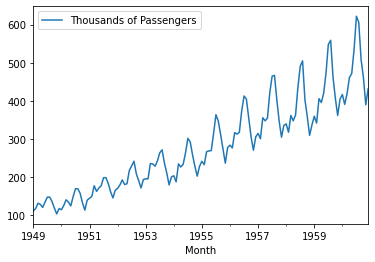

In [21]:
df_airlines.plot()

#this graph is seasonal graph with upward trend
# This is not stationary 

In [22]:
# to check the data is stationary or not, we use Dickey Fuller test 

from statsmodels.tsa.stattools import adfuller

In [23]:
# creating function to check if the data is stationary or not


def adf_test(series): # takes series ie number of passengers 
    
    result= adfuller(series)
    
    print("ADF statistics: {} ". format(result[0]))
    print("p value : {} ". format(result[1]))
    
    if result[1]<= 0.05: #p value
        print("Strong evidence against null hypothesis. Reject the null Hypothesis Data has no unit root and is stationary")
        
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")
    
    

In [25]:
adf_test(df_airlines['Thousands of Passengers'])

#p value is 0.99 and data is not stationary

ADF statistics: 0.8153688792060472 
p value : 0.991880243437641 
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


## 2. to make data stationary: calculate differencing

1. Shift down all the values within Passenger column by 1
2. Find the difference and store in new column 
3. Pass the new column by dropping the NaN value to adf test to see if we made the data stationary. d=1
4. If data is still not stationary, create a new column called second difference and shift the first difference column by 1. 
5. Pass Second difference column to ADF() 

In [27]:
#creating new column 
df_airlines['Passengers First Difference']= df_airlines['Thousands of Passengers']- df_airlines['Thousands of Passengers'].shift(1)

In [28]:
df_airlines.head()
#shifted by 1 and first value is NaN

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [30]:
# new column has nan value
#adf_test(df_airlines['Passengers First Difference'])
# error:  exog contains inf or nans

#sol: drop na before passing into adf test 

In [31]:
adf_test(df_airlines['Passengers First Difference'].dropna())

#again null hypothesis is rejected and it has indicated that it is non stationary. 
#Now d=1 ie number of times we have calculated differencing



ADF statistics: -2.8292668241700056 
p value : 0.054213290283824704 
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [32]:
# second differencing 
# here we need to shift 'Passengers First Difference' by 1

df_airlines['Passengers Second Difference']= df_airlines['Passengers First Difference']- df_airlines['Passengers First Difference'].shift(1)

In [33]:
df_airlines.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [34]:
adf_test(df_airlines['Passengers Second Difference'].dropna())

#now p= 0.000(29times)273
#d=2

ADF statistics: -16.384231542468495 
p value : 2.7328918500143186e-29 
Strong evidence against null hypothesis. Reject the null Hypothesis Data has no unit root and is stationary


### Seasonal data SARIMAX

1. As this is seasonal data, we need to do shifting for 12 times. 
2. shifting it by 12 considering the original passenger column
3. Just by shifting 12 by 1 time we get stationary data


In [35]:
df_airlines['Passengers Twelfth Difference']= df_airlines['Thousands of Passengers']- df_airlines['Thousands of Passengers'].shift(12)


In [36]:
adf_test(df_airlines['Passengers Twelfth Difference'].dropna())
#p= 0.01

ADF statistics: -3.383020726492481 
p value : 0.011551493085514952 
Strong evidence against null hypothesis. Reject the null Hypothesis Data has no unit root and is stationary


#### getting back to ARIMA

## To determine P and C value

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # pacf for p and acf for c

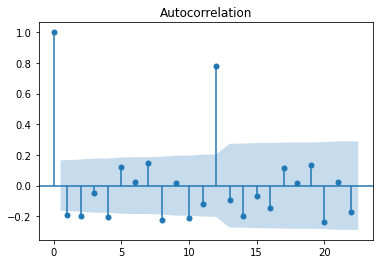

In [41]:
acf= plot_acf(df_airlines['Passengers Second Difference'].dropna())

#here I am providing Passengers second diff, as we need to provide stationary data. 

#As seen in the graph, I can see that there is seasonal data pattern is drawn
#her q= 13, considering from 0 till the high value btw 0 10 15. 
# one in 0 is not considered

#q is co efficient. after 1 point, it is crossing my bound in greater extent 

### ACF

- It uses Pearson correlation.
- Blue on top is upper bound and bottom is lower bound. These bounds will increase as going. 


-     x     y      z
-    Jan    Feb    Mar  -> first timestamp data 
-    Feb.   Mar    Apr  -> 2nd 
-    Mar.   Apr.   May 
- 
-   (t-2)  (t-1)   t
-
- Here in ACF we try to find co relation (impact on sales) between Jan to feb -> feb to mar. also, Jan to march 
- ie, Direct and Indirect impact

#### We are finding moving average with the help of ACF

#### With help of ACF, how to find parameter  "q". q is a co- efficient

### PACF
#### We are performing auto regression and finding value of "p"

#### Integrated value = number of times we are calculating differences "d"

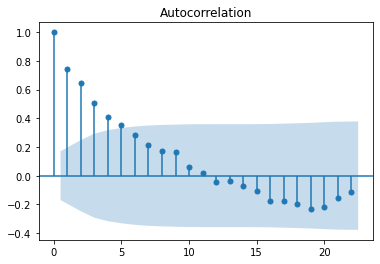

In [44]:
acf12= plot_acf(df_airlines['Passengers Twelfth Difference'].dropna())

#here q=5 (outside the bound)
# I am not counting 1st as it is 0 

# Even here, bound is increasing. Bound here is error 

/Users/melissavidiera/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


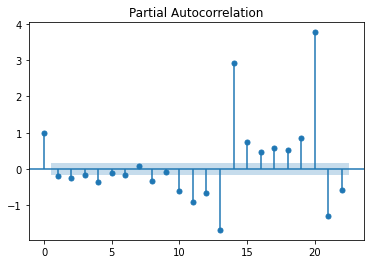

In [45]:
pacf= plot_pacf(df_airlines['Passengers Second Difference'].dropna())

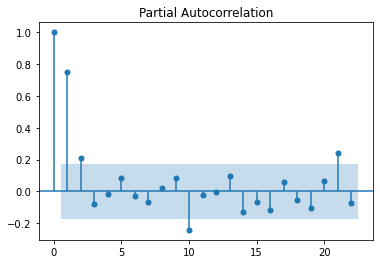

In [46]:
pacf12= plot_pacf(df_airlines['Passengers Twelfth Difference'].dropna())
#p= 2. (above the bound)
# if p=2 works well, then we are considering it. 
#if not, then consider p=10 (at 10th point my data is going beyond bound)

#### Creating train and test data

In [48]:
df_airlines

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers Twelfth Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [50]:
#dataset starts with jan 1st 1949 and ends on Dec 1 1960. 

from datetime import datetime, timedelta

train_dataset_end= datetime(1955,12,1) #from 1949 till 1955
test_dataset_end= datetime(1960,12,1) # from 1956 till 1960

In [51]:
train_data= df_airlines[:train_dataset_end] # all rows till test_dataset_end

test_data= df_airlines[train_dataset_end + timedelta(days=1)  :test_dataset_end ]

In [53]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers Twelfth Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


# ARIMA Model Creation


In [52]:
from statsmodels.tsa.arima_model import ARIMA


In [54]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers Twelfth Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


#### Parameters in ARIMA 
- (p,d,q)

#### p d q
- p: from pacf: in graph shown below, I can see that 10th data shows the impact. So starting p=10. 
- d: we have done differencing twice. so d=2
- q: from acf: in graph, I can see that 12th data shows high impact. 
- Providing q=12 in ARIMA gets me an error as q=12 makes it as seasonal ARIMA SARIMA

/Users/melissavidiera/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


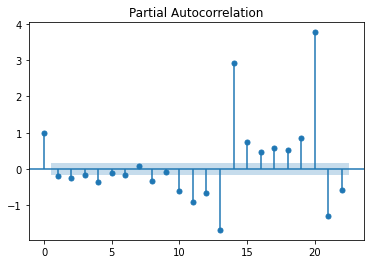

In [56]:
pacf= plot_pacf(df_airlines['Passengers Second Difference'].dropna())

In [86]:
model_ARIMA= ARIMA(train_data['Thousands of Passengers'], (4,2,3))

#making moving avg q value to 0 for now. 
#making it 12 is getting me error while fitting model
# q=12 makes Seasonal ARIMA

/Users/melissavidiera/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/melissavidiera/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information

In [89]:
model_ARIMA_fit= model_ARIMA.fit()

/Users/melissavidiera/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:1451: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(self._index, pd.Int64Index):


AttributeError: 'pandas._libs.properties.CachedProperty' object has no attribute 'func'

In [90]:
model_ARIMA_fit.summary()
# here I can see that value of p is all less than 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                        ARIMA(10, 2, 0)   Log Likelihood                -357.239
Method:                               css-mle   S.D. of innovations             18.333
Date:                        Thu, 28 Apr 2022   AIC                            738.477
Time:                                05:16:38   BIC                            767.358
Sample:                            03-01-1949   HQIC                           750.072
                                 - 12-01-1955                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0163      0.347      0.047      0.962      -0.665       0.697
ar.L1.D2.Thousands of Passengers     -0.5165      0.097     -5.300      0.000      -0.707      -0.325
ar.L2.D2.Thousands of Passengers     -0.7203      0.108     -6.650      0.000      -0.933      -0.508
ar.L3.D2.Thousands of Passengers     -0.4856      0.120     -4.032      0.000      -0.722      -0.250
ar.L4.D2.Thousands of Passengers     -0.7506      0.131     -5.717      0.000      -1.008      -0.493
ar.L5.D2.Thousands of Passengers     -0.5065      0.151     -3.360      0.001      -0.802      -0.211
ar.L6.D2.Thousands of Passengers     -0.5204      0.149     -3.500      0.000      -0.812      -0.229
ar.L7.D2.Thousands of Passengers     -0.3055      0.136     -2.250      0.024      -0.572      -0.039
ar.L8.D2.Thousands of Passengers     -0.5943      0.125     -4.744      0.000      -0.840      -0.349
ar.L9.D2.Thousands of Passengers     -0.2966      0.116     -2.556      0.011      -0.524      -0.069
ar.L10.D2.Thousands of Passengers    -0.4826      0.101     -4.765      0.000      -0.681      -0.284
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9098           -0.5670j            1.0720           -0.0887
AR.2             0.9098           +0.5670j            1.0720            0.0887
AR.3             0.4844           -0.9210j            1.0406           -0.1729
AR.4             0.4844           +0.9210j            1.0406            0.1729
AR.5            -0.9676           -0.4146j            1.0527           -0.4356
AR.6            -0.9676           +0.4146j            1.0527            0.4356
AR.7            -0.6004           -0.8889j            1.0726           -0.3445
AR.8            -0.6004           +0.8889j            1.0726            0.3445
AR.9            -0.1335           -1.1349j            1.1427           -0.2686
AR.10           -0.1335           +1.1349j            1.1427            0.2686
------------------------------------------------------------------------------
"""

### Prediction 

In [65]:
test_data.index[0] # first date

Timestamp('1956-01-01 00:00:00')

In [66]:
test_data.index[-1] #last date

Timestamp('1960-12-01 00:00:00')

In [67]:
# while predicting any time series model, i need to provide start and end date


pred_start_date= test_data.index[0]
pred_end_date= test_data.index[-1]

print(pred_start_date)
print(pred_end_date)

# ie, predict from 1956 jan 1st till 1960 Dec 1
# ie start and end date of test_dataset_end

1956-01-01 00:00:00
1960-12-01 00:00:00


In [69]:
pred= model_ARIMA_fit.predict(start=pred_start_date , end=pred_end_date )

/Users/melissavidiera/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [71]:

residuals= test_data['Thousands of Passengers']- pred
residuals

Month
1956-01-01    302.695989
1956-02-01    289.830787
1956-03-01    319.329668
1956-04-01    328.562171
1956-05-01    298.689302
1956-06-01    354.352086
1956-07-01    426.271453
1956-08-01    441.529645
1956-09-01    350.001333
1956-10-01    315.913232
1956-11-01    242.711497
1956-12-01    281.647798
1957-01-01    333.119973
1957-02-01    304.741451
1957-03-01    367.652390
1957-04-01    343.198144
1957-05-01    343.325747
1957-06-01    413.019340
1957-07-01    483.932100
1957-08-01    477.557322
1957-09-01    403.265273
1957-10-01    346.226386
1957-11-01    281.802339
1957-12-01    337.112080
1958-01-01    347.244788
1958-02-01    325.413858
1958-03-01    364.318089
1958-04-01    341.830107
1958-05-01    355.290669
1958-06-01    435.056471
1958-07-01    504.184605
1958-08-01    505.771338
1958-09-01    405.976055
1958-10-01    350.193226
1958-11-01    301.548551
1958-12-01    341.117852
1959-01-01    364.677793
1959-02-01    347.031475
1959-03-01    403.339727
1959-04-01    392.1

<AxesSubplot:ylabel='Density'>

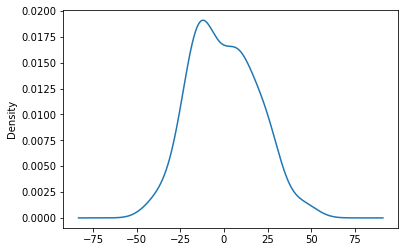

In [73]:
model_ARIMA_fit.resid.plot(kind= 'kde')

# we are getting gaussian distribution which is great

In [74]:
# creating a new column for the predicted value within test_data DF

test_data['Predicted_ARIMA']= pred

/var/folders/pz/8fj7_jqs1_lglvwks1ym9jl40000gn/T/ipykernel_1460/409100395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']= pred


<AxesSubplot:xlabel='Month'>

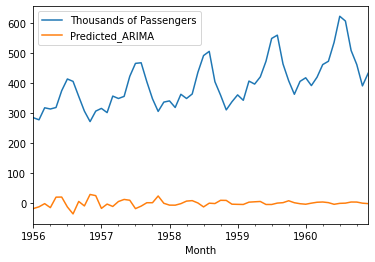

In [75]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

#Arima has given bad model

# SARIMA

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

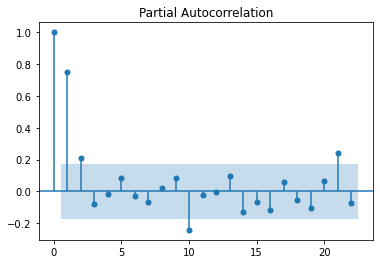

In [79]:
pacf12= plot_pacf(df_airlines['Passengers Twelfth Difference'].dropna()) #p=3

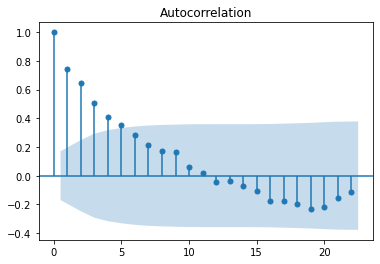

In [77]:
acf12= plot_acf(df_airlines['Passengers Twelfth Difference'].dropna()) #q=5

In [80]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))
# As per the seasonal graph shown above, p=3, q=5 d=0 as we have not used differences in ARIMAX order part
# but we have done once in seasonal, ie using 12 as shift. That becomes seasonal. 
#This will be mentioned in next arg  seasonal_order=(0,1,0,12) 12 for 12 months 

/Users/melissavidiera/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [84]:
model_SARIMA_fit=model_SARIMA.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18261D+00    |proj g|=  4.32163D-02

At iterate    5    f=  3.17613D+00    |proj g|=  3.18802D-02

At iterate   10    f=  3.17248D+00    |proj g|=  2.87534D-03

At iterate   15    f=  3.16990D+00    |proj g|=  1.51301D-02

At iterate   20    f=  3.16244D+00    |proj g|=  1.29903D-02

At iterate   25    f=  3.15869D+00    |proj g|=  3.73724D-03

At iterate   30    f=  3.15804D+00    |proj g|=  2.76848D-03

At iterate   35    f=  3.15800D+00    |proj g|=  5.64635D-04

At iterate   40    f=  3.15797D+00    |proj g|=  4.61130D-03

At iterate   45    f=  3.15777D+00    |proj g|=  6.35353D-03

At iterate   50    f=  3.15762D+00    |proj g|=  1.29730D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/melissavidiera/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [85]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Thu, 28 Apr 2022   AIC                            548.480
Time:                                     05:09:57   BIC                            568.970
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5973      0.938      0.637      0.524      -1.240       2.435
ar.L2          0.8311      0.232      3.584      0.000       0.377       1.285
ar.L3         -0.4515      0.894     -0.505      0.613      -2.203       1.300
ma.L1          0.1848      1.169      0.158      0.874      -2.107       2.476
ma.L2         -0.5332      1.267     -0.421      0.674      -3.016       1.950
ma.L3         -0.0988      0.386     -0.256      0.798      -0.855       0.658
ma.L4         -0.1275      0.340     -0.375      0.708      -0.794       0.539
ma.L5          0.2470      0.358      0.689      0.491      -0.455       0.949
sigma2        87.7358     81.837      1.072      0.284     -72.661     248.133
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers Twelfth Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,-0.615676
1960-09-01,508.0,-98.0,-82.0,45.0,3.106048
1960-10-01,461.0,-47.0,51.0,54.0,2.964138
1960-11-01,390.0,-71.0,-24.0,28.0,-0.732253
1960-12-01,432.0,42.0,113.0,27.0,-2.251370


### Prediction

In [92]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [93]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

/Users/melissavidiera/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='Month'>

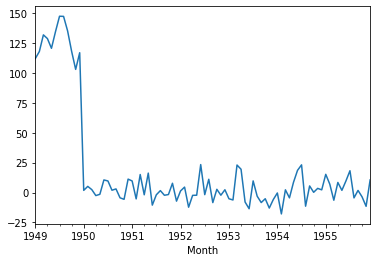

In [94]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

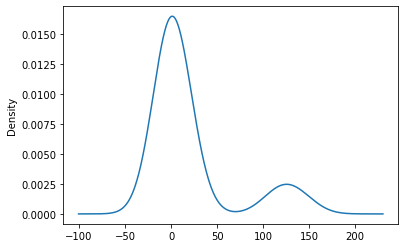

In [95]:
model_SARIMA_fit.resid.plot(kind='kde')

In [99]:
test_data['Predicted_SARIMA']=pred_Sarima

/var/folders/pz/8fj7_jqs1_lglvwks1ym9jl40000gn/T/ipykernel_1460/1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [100]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers Twelfth Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,-18.695989,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,-12.830787,NaN
1956-03-01,317.0,40.0,47.0,50.0,-2.329668,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,-15.562171,NaN
1956-05-01,318.0,5.0,9.0,48.0,19.310698,NaN
1956-06-01,374.0,56.0,51.0,59.0,19.647914,NaN
1956-07-01,413.0,39.0,-17.0,49.0,-13.271453,403.401887
1956-08-01,405.0,-8.0,-47.0,58.0,-36.529645,385.075217
1956-09-01,355.0,-50.0,-42.0,43.0,4.998667,349.451164


<AxesSubplot:xlabel='Month'>

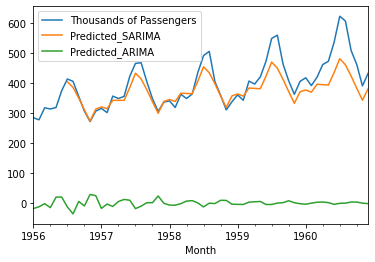

In [101]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()
